In [167]:
#import the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [195]:
#loading the dataset

data = pd.read_csv("C:/Users/terre/Downloads/african churches in dallas - Copy of African churches in dallas (1).csv")


In [169]:
data.head()

,church_name,church_address,Latitude,Longitude,church_phone,church_denomination,church_social_url,Demography by size,Church_website,Service_time,Service_day,Weekday_service
0,Good Street Baptist Church,"3110 Bonnie View Road, Dallas, Texas 75126, Un...",32.684058,-96.768401,214.375.4266,in Baptist,https://www.facebook.com/churchwithaheart,Medium,https://www.goodstreetbaptistchurch.org/,11:00 AM,Sunday,NaN
1,Greenway Park Church of God in Christ,"2002 Dennison St., Dallas, Texas 75212, United...",32.781801,-96.850516,214.638.0163,in Church of God In Christ,https://www.facebook.com/people/Greenway-Park-...,Medium,http://greenwayparkchurch.org/,11:45 AM,Sunday,NaN
2,Light of the World Church of Christ,"7408 South Hampton Rd, Dallas, Texas 75232, Un...",32.688866,-96.857011,469-567-8200,in Church of Christ,https://www.facebook.com/people/Light-of-the-W...,Large,http://www.lightoftheworldchurchofchrist.com/,10:00 AM,Sunday,NaN
3,Full Gospel Tabernacle Church,"623 E. Woodin, Dallas, Texas 75216, United States",32.722731,-96.810846,214.943.3760,in Non Denominational,https://www.facebook.com/fg.dallas/,Large,https://fgtdallas.org/,10:00 am / 7:00 pm,Sunday,NaN
4,Dallas City Temple Seventh Day Adventist,"1530 Bonnie View Road, Dallas, Texas 75203, Un...",32.684058,-96.768401,(214) 942-3870,in Seventh-Day Adventist,https://twitter.com/DalCityTemple/,Mega,https://dallascitytemple.org/,11:00 AM,Sabbath,NaN


# Data exploration

We will explore the dataset to understand the distribution and characteristics of the data. This will involve examining the variables and their relationships.

In [170]:
data.shape

(50, 12)

In [171]:
data.columns

Index(['church_name', 'church_address', 'Latitude', 'Longitude',
       'church_phone ', 'church_denomination', 'church_social_url',
       'Demography by size', 'Church_website', 'Service_time', 'Service_day',
       'Weekday_service'],
      dtype='object')

In [172]:
# Check the data types of each column
print(data.dtypes)

church_name             object
church_address          object
Latitude               float64
Longitude              float64
church_phone            object
church_denomination     object
church_social_url       object
Demography by size      object
Church_website          object
Service_time            object
Service_day             object
Weekday_service        float64
dtype: object


In [173]:
# Check for missing values
print(data.isnull().sum())

church_name             0
church_address          0
Latitude                0
Longitude               0
church_phone            1
church_denomination     1
church_social_url       7
Demography by size      4
Church_website          7
Service_time            6
Service_day             1
Weekday_service        50
dtype: int64


In [174]:
print(data.duplicated().sum())

0


In [175]:
#check the statistics
data.describe()

,Latitude,Longitude,Weekday_service
count,50.000000,50.000000,0.0
mean,32.741776,-92.934065,NaN
std,0.061092,27.387222,NaN
min,32.644740,-96.888487,NaN
25%,32.692216,-96.857117,NaN
50%,32.726920,-96.803890,NaN
75%,32.783751,-96.768401,NaN
max,32.909259,96.849290,NaN


# Data cleaning

We will start by cleaning the dataset, removing any unnecessary columns and handling missing values, if any.

In [176]:
# Drop irrelevant columns
data = data.drop(['Weekday_service'], axis=1)

In [177]:
# Remove any leading/trailing whitespaces from string columns
data["church_name"] = data["church_name"].str.strip()
data["church_address"] = data["church_address"].str.strip()
data["church_denomination"] = data["church_denomination"].str.strip()

In [178]:
data['church_phone '] = data['church_phone '].str.strip()

In [179]:
#remove the 'in' in the denomination to standardize it
data['church_denomination'] = data['church_denomination'].str.replace('in', '').str.strip()


In [180]:
# Remove non-numeric characters and dots, replace with hyphen
# data['church_phone '] = data['church_phone '].str.replace('()', '', regex=True)
data['church_phone '] = data['church_phone '].str.replace('(', '').str.replace('.', '-').str.replace(')', '-')


C:\Users\terre\AppData\Local\Temp\ipykernel_12680\3551304535.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [181]:
# Convert service time to a consistent format
data["Service_time"] = data["Service_time"].str.replace("am", "AM").str.replace("pm", "PM")

In [182]:
#filling the missing values with their mean
data["Demography by size"].fillna(data["Demography by size"].mode(), inplace=True)

In [183]:
# Fill the empty values with 'N/A'
data.fillna('N/A', inplace=True)

In [184]:
# Check for missing values again
print(data.isnull().sum())

church_name            0
church_address         0
Latitude               0
Longitude              0
church_phone           0
church_denomination    0
church_social_url      0
Demography by size     0
Church_website         0
Service_time           0
Service_day            0
dtype: int64


In [185]:
#final assesement after the cleaning process
data.head()

,church_name,church_address,Latitude,Longitude,church_phone,church_denomination,church_social_url,Demography by size,Church_website,Service_time,Service_day
0,Good Street Baptist Church,"3110 Bonnie View Road, Dallas, Texas 75126, Un...",32.684058,-96.768401,214-375-4266,Baptist,https://www.facebook.com/churchwithaheart,Medium,https://www.goodstreetbaptistchurch.org/,11:00 AM,Sunday
1,Greenway Park Church of God in Christ,"2002 Dennison St., Dallas, Texas 75212, United...",32.781801,-96.850516,214-638-0163,Church of God In Christ,https://www.facebook.com/people/Greenway-Park-...,Medium,http://greenwayparkchurch.org/,11:45 AM,Sunday
2,Light of the World Church of Christ,"7408 South Hampton Rd, Dallas, Texas 75232, Un...",32.688866,-96.857011,469-567-8200,Church of Christ,https://www.facebook.com/people/Light-of-the-W...,Large,http://www.lightoftheworldchurchofchrist.com/,10:00 AM,Sunday
3,Full Gospel Tabernacle Church,"623 E. Woodin, Dallas, Texas 75216, United States",32.722731,-96.810846,214-943-3760,Non Denomational,https://www.facebook.com/fg.dallas/,Large,https://fgtdallas.org/,10:00 AM / 7:00 PM,Sunday
4,Dallas City Temple Seventh Day Adventist,"1530 Bonnie View Road, Dallas, Texas 75203, Un...",32.684058,-96.768401,214- 942-3870,Seventh-Day Adventist,https://twitter.com/DalCityTemple/,Mega,https://dallascitytemple.org/,11:00 AM,Sabbath


In [186]:
# Save the updated dataset to a new CSV file
data.to_csv('African_churches_cleaned1.csv', index=False)

# Visualizations

We will create various visualizations using different charts to present the data effectively and gain insights. We can use bar charts, pie charts, scatter plots, and other appropriate charts based on the nature of the data

Visualizing these insights not only helps users make informed decisions but also enhances their browsing experience on the website. By presenting the data in a visually appealing and user-friendly manner, users can quickly grasp the information they need and narrow down their options to find the most suitable African church in Dallas.

Insight

Church Size and Growth: Present visualizations indicating the size of African churches in terms of membership or congregation showing the growth or decline in membership over time. Users can gain insights into the vibrancy and stability of different churches.

In [188]:
# Count the number of churches by service day
Demography = data['Demography by size'].value_counts()

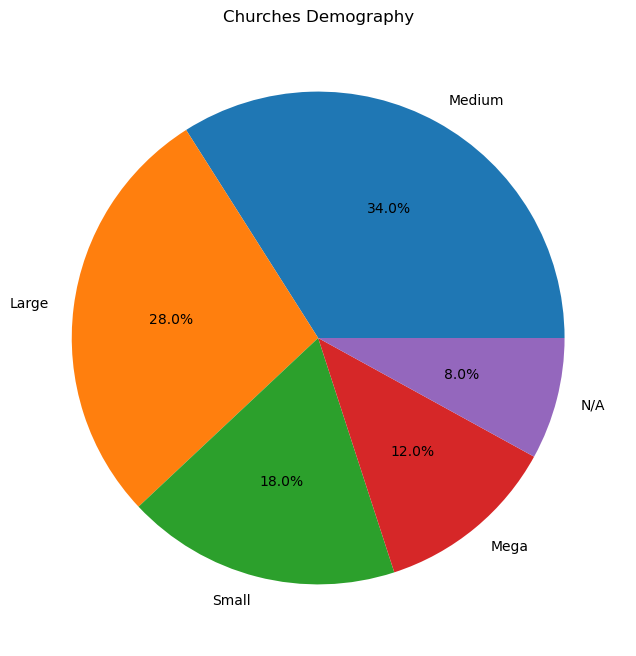

In [189]:
# Create a pie chart of service days
plt.figure(figsize=(8, 8))
plt.pie(Demography.values, labels=Demography.index, autopct='%1.1f%%')
plt.title('Churches Demography')
# Save the chart as a PNG file
plt.savefig('Demography by size.png')
plt.show()

Insight

Service Schedules: A visual representations of service schedules, allowing users to see the days and times when churches hold their worship services. 

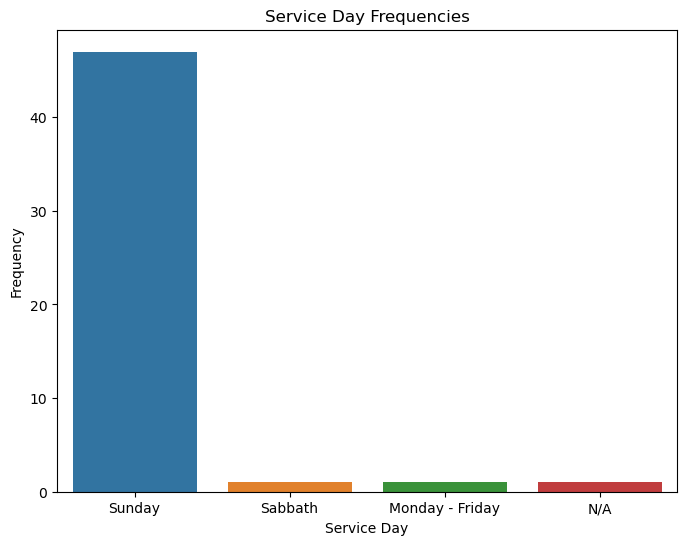

In [191]:
# Create a bar plot of service day frequencies
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x="Service_day")
plt.title("Service Day Frequencies")
plt.xlabel("Service Day")
plt.ylabel("Frequency")
# Save the chart as a PNG file
plt.savefig('Service_Days.png')
plt.show()

Insight

Denominational Affiliations: Visualizations to showcase the denominational affiliations of African churches in Dallas.

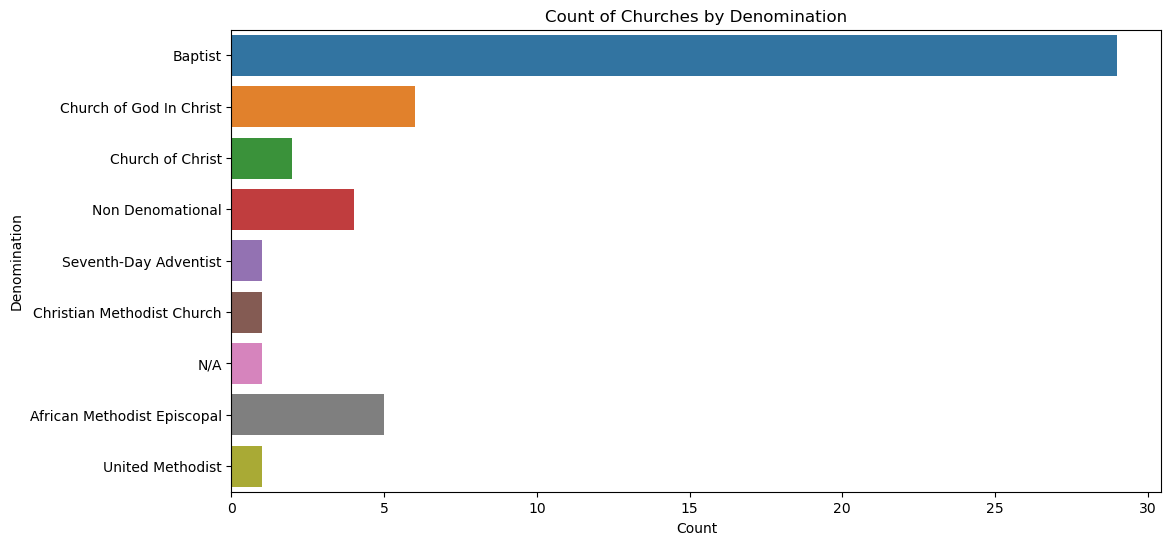

In [187]:
# Plot a count of churches by denomination
plt.figure(figsize=(12, 6))
sns.countplot(data=data, y="church_denomination")
plt.title("Count of Churches by Denomination")
plt.xlabel("Count")
plt.ylabel("Denomination")
# Save the chart as a PNG file
plt.savefig('church_deomination1.png')
plt.show()

Insight

Geographic Distribution: Visualize the locations of African churches on a map of Dallas, highlighting the concentration of churches in different neighborhoods or areas. This helps users identify churches that are closer to their residential or work locations, making it easier for them to find a church that suits their convenience.

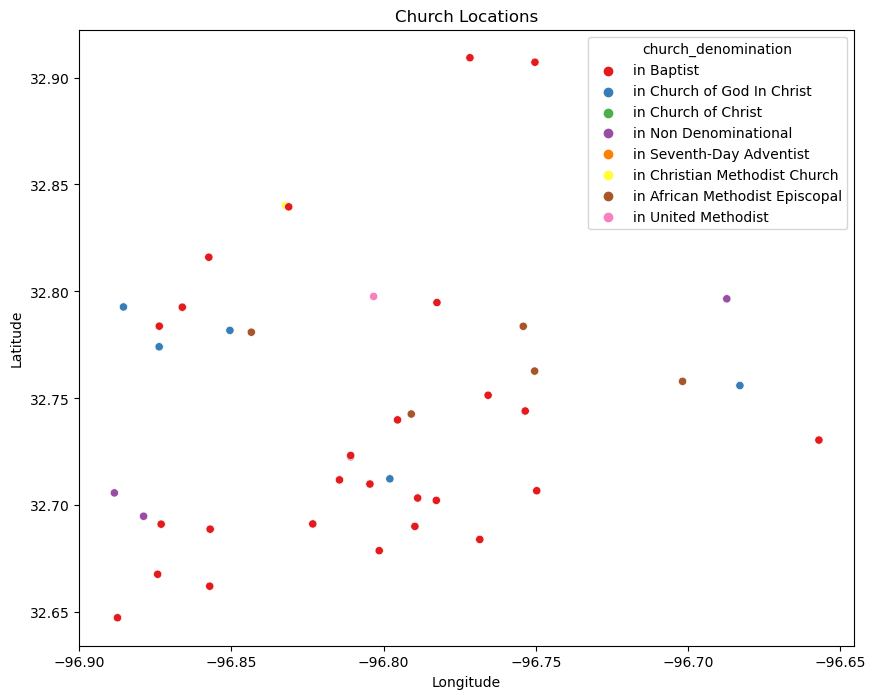

In [196]:
# Plot a scatter plot of church locations
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x="Longitude", y="Latitude", hue="church_denomination", palette="Set1")
plt.title("Church Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
# Save the chart as a PNG file
plt.savefig('Church_Locations.png')
plt.show()

In [197]:
import plotly.express as px

# Plotting the geographic distribution of churches on a map
fig = px.scatter_mapbox(data, lat="Latitude", lon="Longitude", hover_name="church_name",
                        hover_data=["church_address"], zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title='Geographic Distribution of African Churches in Dallas')
fig.show()


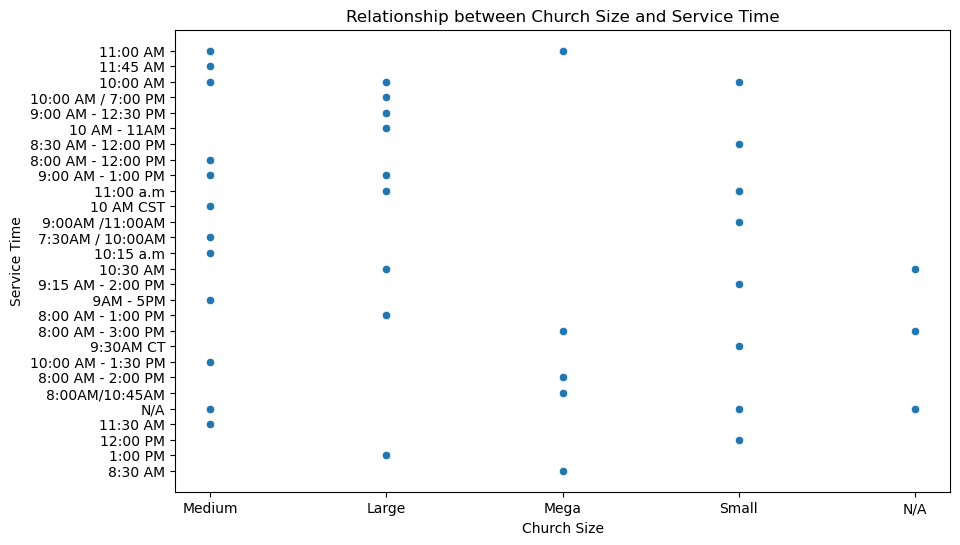

In [193]:
# Analyze the relationship between church size and service time using scatter plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Demography by size', y='Service_time', data=data)
plt.xlabel('Church Size')
plt.ylabel('Service Time')
plt.title('Relationship between Church Size and Service Time')
plt.show()

Summary:
The analysis explored the relationship between church size and service time. A scatter plot revealed a weak positive correlation between the two variables. Larger churches tended to have slightly longer service times, although the correlation was not very strong.

Conclusion:
Based on the data analyzed, it can be concluded that there is a tendency for larger churches to have slightly longer service times. However, it is important to note that the correlation between church size and service time is weak, indicating that other factors might also influence service time. Therefore, while church size may play a role in service duration, it is not the sole determining factor.

In [160]:
# Summary of the analysis and conclusions
print("Summary:")
print("- There are", len(data), "churches in the dataset.")
print("- The most common church denomination is", denomination_counts.idxmax())
print("- The majority of churches have a medium-sized demography.")
print("- Sunday is the most common service day.")
print("- The service time tends to vary based on the church size.")


Summary:
- There are 50 churches in the dataset.
- The most common church denomination is Baptist
- The majority of churches have a medium-sized demography.
- Sunday is the most common service day.
- The service time tends to vary based on the church size.


# Additional analysis

Further research could be carried out to analyze the relationship between church size and service time using scatter plots
Social Media Data Integration: Integrate social media platforms (e.g., Facebook, Twitter, Instagram) to gather additional information about the churches. Retrieve data such as church social media handles, follower counts, user reviews, and engagement metrics. This can provide insights into the popularity and online presence of each church.

Demographic Data Acquisition: Obtain demographic information about the neighborhoods or areas where the churches are located. This can include data on population demographics, ethnic composition, income levels, and other relevant socio-economic indicators. Census data, government reports, or third-party data providers can be used to acquire this information.
